In [1]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
#import oa_temp as oa
#import sa_temp as sa
import db_plotting

In [2]:
#data24_original = pd.read_csv('data24_revised.csv', parse_dates = True, index_col = 0)
#data24 = pd.read_csv('FlexlabX1aNoLeakBaseline0907 (0901-0907).csv', parse_dates = True)
data24 = pd.read_csv('FlexlabX1aNoLeakBaseline1206.csv', parse_dates = True)
data25 = pd.read_csv('data24_revised.csv', parse_dates = True, index_col = 0)
day_range=[9,6,7]

In [3]:
data24["datetime"]=pd.to_datetime(data24["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [4]:
data24['datetime'] = pd.to_datetime(data24['datetime'])
data25['datetime'] = pd.to_datetime(data25['datetime'])

data24=data24.set_index('datetime')

In [5]:
data24.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
Tcool_SP                                     float64
Theat_SP                                     float64
VAV: North Zone Damper Control Signal        float64
VAV: South Zone Room Air Temperature         float64
VAV: South Zone Damper Control Signal        f

In [6]:
print(data24)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-21 01:00:00           0  20048400.0  57.920044  66.176050   
2021-08-21 01:02:00           3  20048520.0  57.920044  66.106780   
2021-08-21 01:04:00           5  20048640.0  57.920044  66.071730   
2021-08-21 01:05:00           7  20048700.0  57.920044  66.037950   
2021-08-21 01:06:00           8  20048760.0  57.920044  66.004390   
...                         ...         ...        ...        ...   
2021-09-07 23:54:00       31136  21599640.0  68.579800  69.117860   
2021-09-07 23:55:00       31137  21599700.0  68.596664  69.123566   
2021-09-07 23:56:00       31138  21599760.0  68.613690  69.129230   
2021-09-07 23:58:00       31141  21599880.0  68.617050  69.104454   
2021-09-08 00:00:00       31144  21600000.0  68.650720  69.115990   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [7]:
print(data25)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-08 22:45:00         34.714160          7.995847         34.537033   
2021-09-08 23:00:00         34.192893          7.942653         34.044000   
2021-09-08 23:15:00         34.062833          8.218353         34.730773   
2021-09-08 23:30:00         35.027853          7.984933         34.653393   
2021-09-08 23:45:00         33.986587          7.903553         34.726673   

In [8]:
print(data24[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:02:00           -3.849032e-06                57.919990
2021-08-21 01:04:00           -2.636470e-06                57.919990
2021-08-21 01:05:00           -2.932371e-06                57.919990
2021-08-21 01:06:00           -3.711714e-06                57.919990
2021-08-21 01:08:00           -2.540616e-06                57.919990
2021-08-21 01:10:00           -3.572613e-06                57.919990
2021-08-21 01:12:00           -2.421279e-06                57.919990
2021-08-21 01:14:00           -3.438798e-06                57.919990
2021-08-21 01:15:00           -2.699786e-06                57.919990
2021-08-21 01:16:00           -2.304247e-06                57.919990
2021-08-21 01:18:00           -3.313123e-06                57.919990
2021-08-21 01:20:00           -2.1

In [9]:
#data24['AHU:Cooling Coil Load']=data24['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data24['AHU: Cooling coil Load']=data24['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data24['AHU: Supply Fan Power']=data24['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data24=data24.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing


In [10]:
print(data24[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:15:00           -3.089187e-06                57.919990
2021-08-21 01:30:00           -1.746978e-06                57.919990
2021-08-21 01:45:00           -1.631427e-05                57.919990
2021-08-21 02:00:00           -1.700000e-05                57.919990
2021-08-21 02:15:00           -1.137672e-01                57.891860
2021-08-21 02:30:00           -2.686695e-01                57.830010
2021-08-21 02:45:00           -2.777121e-01                57.768158
2021-08-21 03:00:00           -1.386757e-01                57.740032
2021-08-21 03:15:00           -1.142656e-03                57.740032
2021-08-21 03:30:00           -1.289450e-05                57.740032
2021-08-21 03:45:00           -8.607115e-07                57.740032
2021-08-21 04:00:00            3.6

In [11]:



data24['datetime']=data24.index
data24['1B-OAT-1']=data24['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [12]:
print(data24.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
Tcool_SP                                     0
Theat_SP                                     0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zone Damper Control Signal        0
AHU: Cooling coil Load                       0
VAV:Core zone Q                              0
AHU: Outdoor 

In [13]:
data24['date'] = data24['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data24['time'] = data24['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data25['date'] = data25['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data25['time'] = data25['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [14]:
baseline_day_mask = (data25['date'] >= datetime.date(2021, 8, 21)) & (data25['date'] <= datetime.date(2021, 8, 21))
test_day_mask24=(data24['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data24['date'] <= datetime.date(2021, day_range[0], day_range[2]))
test_day_mask25=(data25['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data25['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [15]:

data_baseline0=data25[baseline_day_mask]
data24 = data24[test_day_mask24]
data25 = data25[test_day_mask25]

In [16]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(16,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(17,unit='d')

# count the days since 08/21/2021 to display the temperature setpoint data correctly
# For example, 09/06-09/07 is 16-17 days after 08/21/2021

data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = data_baseline0A
print(data_baseline)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-09-06 00:00:00         34.139420          8.067873         34.185020   
2021-09-06 00:15:00         34.032287          8.271507         34.119960   
2021-09-06 00:30:00         34.080907          8.123280         34.443220   
2021-09-06 00:45:00         34.109420          8.302420         34.686187   
2021-09-06 01:00:00         34.337320          7.940947         34.927867   
...                               ...               ...               ...   
2021-09-07 22:45:00         33.842467          8.092507         34.662933   
2021-09-07 23:00:00         34.225773          8.136513         34.559740   
2021-09-07 23:15:00         33.781613          7.943327         34.009013   
2021-09-07 23:30:00         34.386813          7.963047         34.448420   
2021-09-07 23:45:00         33.785427          8.199240         34.636660   

In [17]:
data24['precool_window'] = 0
data24['gta_window'] = 0

data25['precool_window'] = 0
data25['gta_window'] = 0

precool_st = datetime.time(10,0,0)
precool_en = datetime.time(14,0,0)

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)

#print(type(data24['datetime'].iloc[0]))
#print(type(datetime.time(14,0,0)))


#gta_ts24 = (data24['time'] > gta_st) & (data24['time'] <= gta_en)
#precool_ts24 = (data24['time'] > precool_st) & (data24['time'] <= precool_en)
gta_ts = (data25['time'] > gta_st) & (data25['time'] <= gta_en)
precool_ts = (data25['time'] > precool_st) & (data25['time'] <= precool_en)

#print(gta_ts)
data24['precool_window'][precool_ts] = 1
data24['gta_window'][gta_ts] = 1

data25['precool_window'][precool_ts] = 1
data25['gta_window'][gta_ts] = 1

print(data24['gta_window'][gta_ts])
print(data25['gta_window'][gta_ts])

datetime
2021-09-06 14:15:00    1
2021-09-06 14:30:00    1
2021-09-06 14:45:00    1
2021-09-06 15:00:00    1
2021-09-06 15:15:00    1
2021-09-06 15:30:00    1
2021-09-06 15:45:00    1
2021-09-06 16:00:00    1
2021-09-06 16:15:00    1
2021-09-06 16:30:00    1
2021-09-06 16:45:00    1
2021-09-06 17:00:00    1
2021-09-06 17:15:00    1
2021-09-06 17:30:00    1
2021-09-06 17:45:00    1
2021-09-06 18:00:00    1
2021-09-07 14:15:00    1
2021-09-07 14:30:00    1
2021-09-07 14:45:00    1
2021-09-07 15:00:00    1
2021-09-07 15:15:00    1
2021-09-07 15:30:00    1
2021-09-07 15:45:00    1
2021-09-07 16:00:00    1
2021-09-07 16:15:00    1
2021-09-07 16:30:00    1
2021-09-07 16:45:00    1
2021-09-07 17:00:00    1
2021-09-07 17:15:00    1
2021-09-07 17:30:00    1
2021-09-07 17:45:00    1
2021-09-07 18:00:00    1
Name: gta_window, dtype: int64
time
2021-09-06 14:15:00    1
2021-09-06 14:30:00    1
2021-09-06 14:45:00    1
2021-09-06 15:00:00    1
2021-09-06 15:15:00    1
2021-09-06 15:30:00    1
2021-

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/851995363.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data24['precool_window'][precool_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/851995363.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data24['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/851995363.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [18]:
data24['date']

datetime
2021-09-06 00:00:00    2021-09-06
2021-09-06 00:15:00    2021-09-06
2021-09-06 00:30:00    2021-09-06
2021-09-06 00:45:00    2021-09-06
2021-09-06 01:00:00    2021-09-06
                          ...    
2021-09-07 22:45:00    2021-09-07
2021-09-07 23:00:00    2021-09-07
2021-09-07 23:15:00    2021-09-07
2021-09-07 23:30:00    2021-09-07
2021-09-07 23:45:00    2021-09-07
Freq: 15T, Name: date, Length: 192, dtype: object

In [19]:
print(data24.columns)
print(data25.columns)
#print(data24_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP', 'Theat_SP',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Damper Control Signal', 'AHU: Cooling coil Load',
       'VAV:Core zone Q', 'AHU: Outdoor Air Damper Position',
       'AHU: Supply Fan Power', 'AHU: Supply Fan Airflow Rate',
       'AHU: Cooling Coil Control Signal', 'VAV:North zone Q',
       'VAV:South zone Q', 'datetime', '1B-OAT-1', 'date', 'precool_window',
       'gta_window'],
      dtype='object')
Index(['desk1

In [20]:
print(data24)

                     Unnamed: 0      time   AHU: MAT   AHU: RAT  \
datetime                                                          
2021-09-06 00:00:00       27680  00:00:00  69.484740  69.257164   
2021-09-06 00:15:00       27697  00:15:00  69.316376  69.185090   
2021-09-06 00:30:00       27714  00:30:00  69.143730  69.112260   
2021-09-06 00:45:00       27733  00:45:00  68.988434  69.056780   
2021-09-06 01:00:00       27750  01:00:00  68.841280  68.999920   
...                         ...       ...        ...        ...   
2021-09-07 22:45:00       31051  22:45:00  68.763720  69.636140   
2021-09-07 23:00:00       31068  23:00:00  63.321800  69.530880   
2021-09-07 23:15:00       31087  23:15:00  63.350914  69.355650   
2021-09-07 23:30:00       31105  23:30:00  64.006960  69.211900   
2021-09-07 23:45:00       31125  23:45:00  68.506580  69.157900   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                                                       

In [21]:
print(data25)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-09-06 00:00:00         34.320720          8.049587         34.160633   
2021-09-06 00:15:00         33.922847          8.032140         34.258147   
2021-09-06 00:30:00         34.537873          8.028300         34.264507   
2021-09-06 00:45:00         33.922753          8.140353         34.312120   
2021-09-06 01:00:00         33.948107          8.010887         34.442907   
...                               ...               ...               ...   
2021-09-07 22:45:00         34.506453          8.018360         34.469913   
2021-09-07 23:00:00         34.468280          8.000673         34.855113   
2021-09-07 23:15:00         33.869267          7.985767         34.251573   
2021-09-07 23:30:00         34.282760          7.905187         34.497573   
2021-09-07 23:45:00         34.015420          8.122087         34.316913   

### Metrics

In [22]:
data24 = data24.assign(COP='COP') 
#data24['COP'] = data24['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data24['COP'] = 2.9

data25 = data25.assign(COP='COP') 
#data25['COP'] = data25['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data25['COP'] = 2.9

In [23]:
data24 = data24.assign(chiller = 'Chiller_load') 
data24['Chiller_load'] = (data24['AHU: Cooling coil Load']/data24['COP'])*1
#data24['cooling_power [W]'] = data24['1A-El-AHU'] + data24['1A-El-Exhaust Fan'] + data24['1A-El-CHWP'] + data24['Chiller_load']

# if change to 1/1.225, can comment out the first 2 lines
data24['AHU: Supply Fan Airflow Rate']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x))
data24['AHU: Supply Fan Airflow Rate']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data24['AHU: Supply Fan Power']=data24['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data24['cooling_power [W]'] = data24['AHU: Supply Fan Power']   + data24['Chiller_load']

data25 = data25.assign(chiller = 'Chiller_load') 
data25['Chiller_load'] = (data25['1A-Th-Chilled Water']/data25['COP'])*-1
#data25['cooling_power [W]'] = data25['1B-El-AHU'] + data25['1B-El-Exhaust Fan'] + data25['1B-El-CHWP'] + data25['Chiller_load']
data25['cooling_power [W]'] = data25['1A-El-AHU'] +  data25['Chiller_load']

In [24]:
#print(data24[['AHU: Supply Fan Airflow Rate','AHU: Supply Fan Power']].head(50))

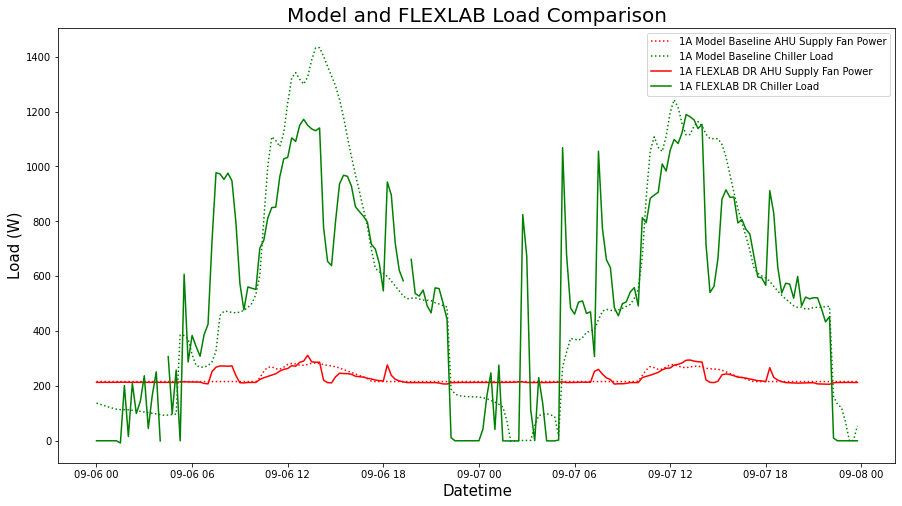

In [25]:
#data24['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data24['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data25['1B-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data25['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)





#plt.show()



fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data24.index,data24['Chiller_load'],'g:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data25.index,data25['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data25.index,data25['Chiller_load'],'g-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

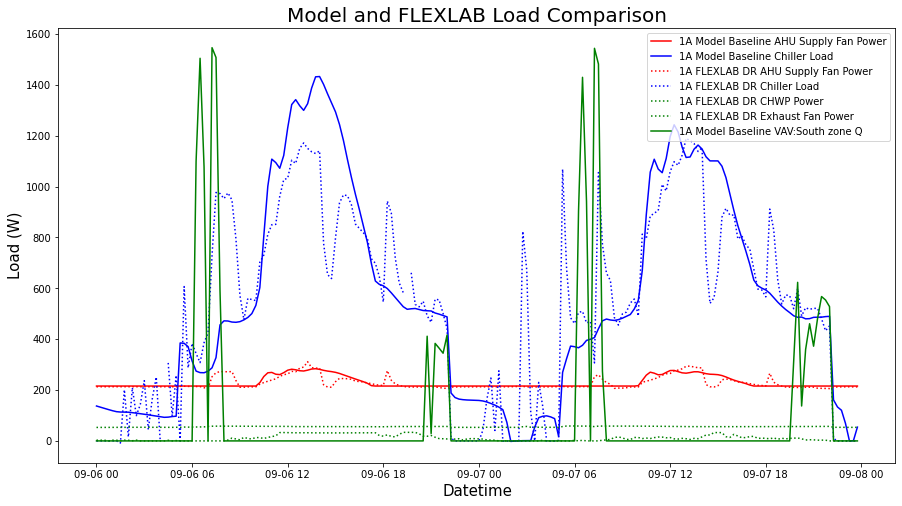

In [26]:
#data24['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data24['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data25['1B-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data25['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)





#plt.show()



fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['AHU: Supply Fan Power'],'r-',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data24.index,data24['Chiller_load'],'b-', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data25.index,data25['1A-El-AHU'],'r:', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data25.index,data25['Chiller_load'],'b:', label="1A FLEXLAB DR Chiller Load")
lns5=ax_left.plot(data25.index,data25['1A-El-CHWP'],'g:', label="1A FLEXLAB DR CHWP Power")
lns6=ax_left.plot(data25.index,data25['1A-El-Exhaust Fan'],'g:', label="1A FLEXLAB DR Exhaust Fan Power")
lns7=ax_left.plot(data24.index,data24['VAV:South zone Q'],'g-', label="1A Model Baseline VAV:South zone Q")


plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6+lns7
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'AHU: Supply Air Temperature', 'AHU: Outdoor Air Damper Position',
       'AHU: Return Air Damper Position',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Reheat Control Signal',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature',
       'VAV: North Zone Reheat Control Signal',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Reheat Control Signal',
       'VAV: South Zone Damper Control Signal', 'AHU:Cooling Coil Load',
       'AHU: Cooling coil Load', 'VAV:Core zone Q', 'AHU: Supply Fan Power',
       'AHU: Supply Fan Airflow Rate', 'VAV:North zone Q', 'VAV:South zone Q',
       'faulty', 'datetime', '1B-OAT-1', 'date', 'precool_window',
       'gta_window'],
      dtype='object')
Index(['desk1_plug_power', 'desk2_plug_power', 'desk3_plug_power',
       'desk4_plug_power', 'desk5_plug_power', 'desk6_plug_power',
       'desk3_light_power', 'desk4_light_power', 'desk2_light_power',
       'desk1_6_light_power', 'desk5_light_power', '1A-VAV1-Zn_Temp',
       '1A-VAV2-Zn_Temp', '1A-VAV3-Zn_Temp', '1A-VAV1-OccupiedCoolingSetpt',
       '1A-VAV1-UnoccupiedCoolingSetpt', '1A-VAV1-OccupiedHeatingSetpt',
       '1A-VAV1-UnoccupiedHeatingSetpt', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-UnoccupiedHeatingSetpt', '1A-VAV2-UnoccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', '1A-VAV3-OccupiedCoolingSetpt',
       '1A-VAV3-UnoccupiedHeatingSetpt', '1A-VAV3-UnoccupiedCoolingSetpt',
       '1A-VAV3-OccupiedHeatingSetpt', '1A-El-AHU', '1A-El-CHWP', '1A-El-HWP',
       '1A-El-Exhaust Fan', '1A-Th-Chilled Water', '1B-OAT-1',
       '1A-MidZone-TCS6-DBT', '1A-NorthZone-DBT', '1A-WindowZone-TCS7-DBT',
       '1A-VAV1-DischargeAirTemp', '1A-VAV2-DischargeAirTemp',
       '1A-VAV3-DischargeAirTemp', '1A-VAV1-DischargeAirflow',
       '1A-VAV2-DischargeAirflow', '1A-VAV3-DischargeAirflow', '1A-ASAM-1',
       '1A-ARAM-1', '1A-SAT-1', '1A-OADA-1-POSN', '1A-RADA-1-POSN', 'datetime',
       'date', 'time', 'precool_window', 'gta_window'],
      dtype='object')

In [27]:



en_1a = []
en_1b = []
# define dates for the calculation

#for day in range(15, 20):    
    #mask_1 = data24['date'] == datetime.date(2021, 9, day)

for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data24['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data24['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
    
    day_en_1b = round((data25['cooling_power [W]'][mask_1].sum()/4000),2)
    #print(day_en_1b)
    en_1b.append(day_en_1b)
    
    
print(en_1a)
print(en_1b)


6
7
[19.2, 18.05]
[18.26, 18.31]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


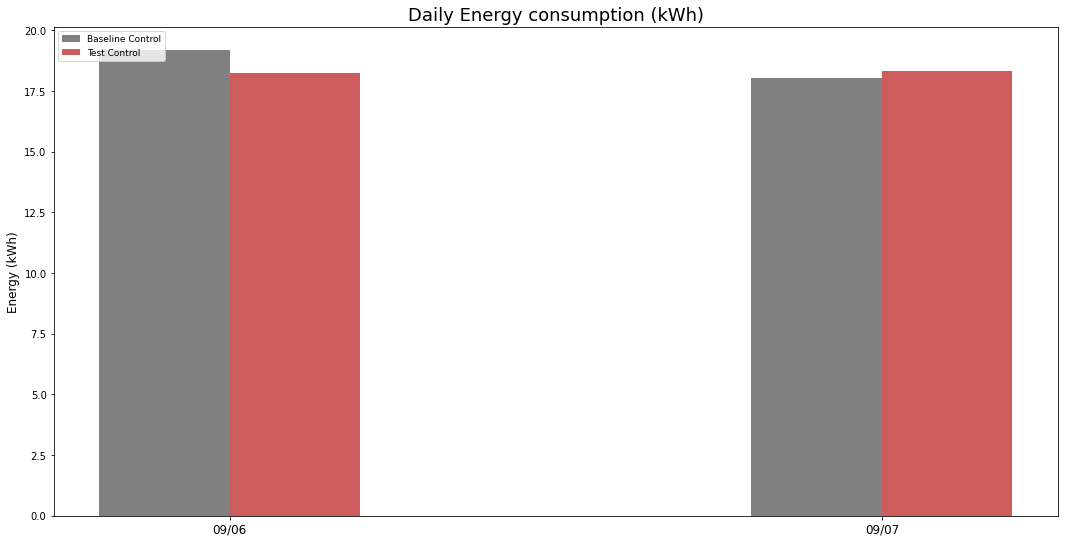

In [28]:
db_plotting.energy_plot(data25, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [29]:
#data25['G36 Demand Shed'] = data25['cooling_power [W]'] - data24['cooling_power [W]']

shed_1a = []
shed_1b = []
shed_oat = []
# define dates for the calculation

for day in range(day_range[1],day_range[2]+1):     
    mask_1 = data24['date'] == datetime.date(2021, day_range[0], day) # days in range,analyze by each day
    #print(day) 
    day_shed_1a = (data24['cooling_power [W]'][mask_1][gta_ts].mean())   # only select 2-6pm
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data25['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)
    
    shed_oat_mean=(data24['1B-OAT-1'][mask_1][gta_ts].mean())  # outdoor air temperature average from 2-6pm
    
    shed_oat.append(shed_oat_mean) # make daily average temp a list



In [30]:
data24['cooling_power [W]'][mask_1][gta_ts]

datetime
2021-09-07 14:15:00    1381.947324
2021-09-07 14:30:00    1363.579064
2021-09-07 14:45:00    1362.805487
2021-09-07 15:00:00    1361.570384
2021-09-07 15:15:00    1337.507073
2021-09-07 15:30:00    1287.289655
2021-09-07 15:45:00    1216.332437
2021-09-07 16:00:00    1144.650670
2021-09-07 16:15:00    1080.348232
2021-09-07 16:30:00    1026.645543
2021-09-07 16:45:00     971.955806
2021-09-07 17:00:00     913.544254
2021-09-07 17:15:00     848.293392
2021-09-07 17:30:00     826.150977
2021-09-07 17:45:00     816.513318
2021-09-07 18:00:00     809.430828
Freq: 15T, Name: cooling_power [W], dtype: float64

In [31]:
#print(data25['G36 Demand Shed'][gta_ts])

/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:71: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


[1246.3143545310945, 1109.285277718559]
['09/06', '09/07']
[1015.198175934778, 951.87846618452]


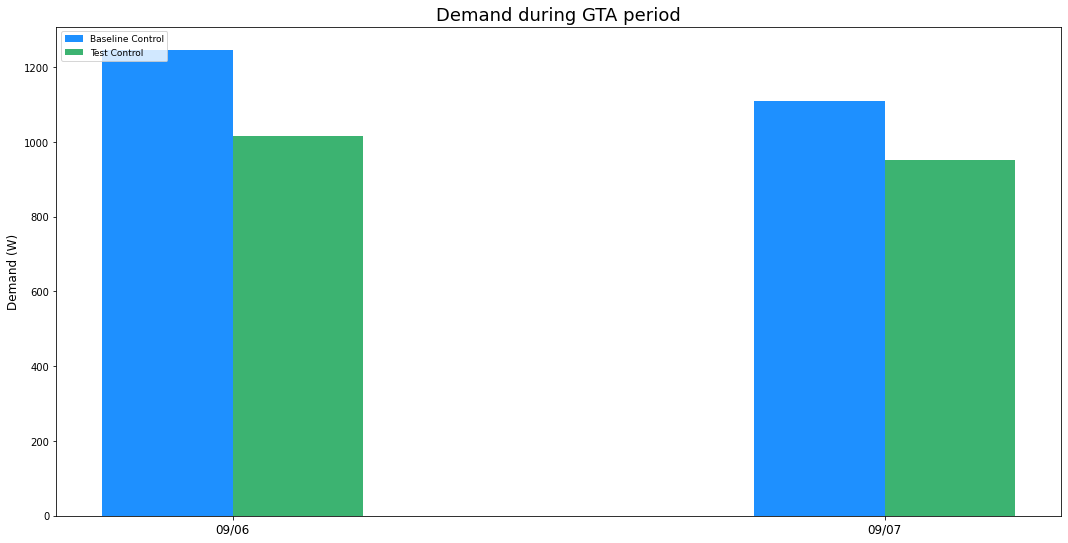

In [32]:
print(shed_1a)
db_plotting.shed_demand_plot(data25, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### SHIFT

In [33]:
data25['G36 Demand shift'] = data25['cooling_power [W]'] - data24['cooling_power [W]']

precool_1a = []
precool_1b = []

# define dates for the calculation
for day in range(day_range[1],day_range[2]+1):    
    mask_1 = data25['date'] == datetime.date(2021, day_range[0], day)
    #print(mask_1) 
        
    day_precool_1a = (data24['cooling_power [W]'][mask_1][precool_ts].mean())
    precool_1a.append(day_precool_1a)
    print(day_precool_1a)
    day_precool_1b = (data25['cooling_power [W]'][mask_1][precool_ts].mean())
    precool_1b.append(day_precool_1b)
    


1451.855770448131
1357.7549851564086


[1451.855770448131, 1357.7549851564086]
['09/06', '09/07']
[1267.9762644286611, 1297.405875997555]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:105: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


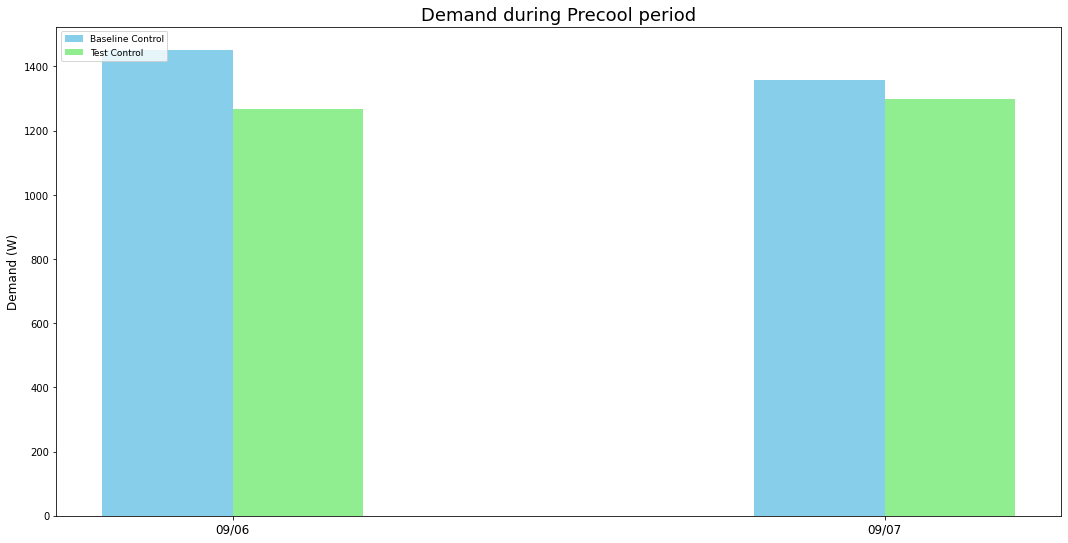

In [34]:
print(precool_1a)
db_plotting.precool_demand_plot(data25, precool_1a, precool_1b, 'Demand during Precool period', 'Demand (W)')

### Thermal comfort

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/3324160661.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .4, wspace=.15)


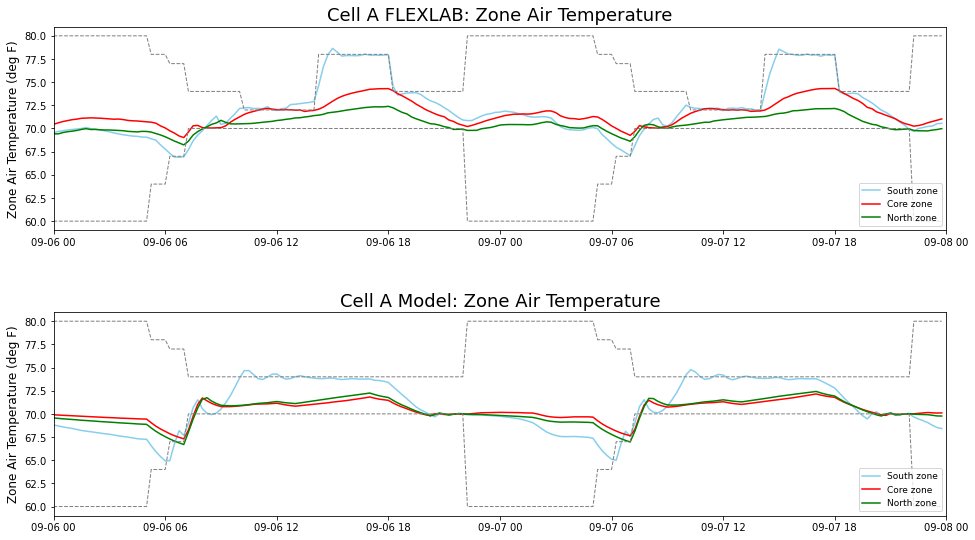

In [35]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data25['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data25['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data25['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data25['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data25['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data24['VAV: South Zone Room Air Temperature'], label = 'South zone', color = 'skyblue')
ax.plot(data24['VAV: Core Zone Room Air Temperature'], label = 'Core zone', color = 'red')
ax.plot(data24['VAV: North Zone Room Air Temperature'], label = 'North zone', color = 'green')
ax.plot(data_baseline['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data_baseline['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell A FLEXLAB: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A Model: Zone Air Temperature', fontsize = 18)

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
ax.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)])


ax1.set_ylim([59,81])
ax.set_ylim([59,81])   # add this additionally to prevent the plot from going off scale

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)

In [36]:
data24 = data24.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [37]:
data24['nor_zat_deg'] = zat_col(data24['VAV: North Zone Room Air Temperature'], data_baseline['1A-VAV1-OccupiedCoolingSetpt'])
data24['cor_zat_deg'] = zat_col(data24['VAV: Core Zone Room Air Temperature'], data_baseline['1A-VAV2-OccupiedCoolingSetpt'])
data24['sou_zat_deg'] = zat_col(data24['VAV: South Zone Room Air Temperature'], data_baseline['1A-VAV3-OccupiedCoolingSetpt'])
#data25['nor_zat_deg'] = zat_col(data25['1B-VAV1-Zn_Temp'], data24_original['1A-VAV1-OccupiedCoolingSetpt'])
#data25['cor_zat_deg'] = zat_col(data25['1B-VAV2-Zn_Temp'], data24_original['1A-VAV2-OccupiedCoolingSetpt'])
#data25['sou_zat_deg'] = zat_col(data25['1B-VAV3-Zn_Temp'], data24_original['1A-VAV3-OccupiedCoolingSetpt'])

data25['nor_zat_deg'] = zat_col(data25['1A-VAV1-Zn_Temp'], data25['1A-VAV1-OccupiedCoolingSetpt'])
data25['cor_zat_deg'] = zat_col(data25['1A-VAV2-Zn_Temp'], data25['1A-VAV2-OccupiedCoolingSetpt'])
data25['sou_zat_deg'] = zat_col(data25['1A-VAV3-Zn_Temp'], data25['1A-VAV3-OccupiedCoolingSetpt'])


print(data25['cor_zat_deg'].isnull().sum())  


#data22['nor_zat_deg'] = zat_col(data22['VAV: North Zone Room Air Temperature'], data22['Tcool_SP'])
#data22['cor_zat_deg'] = zat_col(data22['VAV: Core Zone Room Air Temperature'], data22['Tcool_SP'])
#data22['sou_zat_deg'] = zat_col(data22['VAV: South Zone Room Air Temperature'], data22['Tcool_SP'])

#data23['nor_zat_deg'] = zat_col(data23['VAV: North Zone Room Air Temperature'], data23['Tcool_SP'])
#data23['cor_zat_deg'] = zat_col(data23['VAV: Core Zone Room Air Temperature'], data23['Tcool_SP'])
#data23['sou_zat_deg'] = zat_col(data23['VAV: South Zone Room Air Temperature'], data23['Tcool_SP'])

#data24['nor_zat_deg'] = zat_col(data24['VAV: North Zone Room Air Temperature'], data24['Tcool_SP'])
#data24['cor_zat_deg'] = zat_col(data24['VAV: Core Zone Room Air Temperature'], data24['Tcool_SP'])
#data24['sou_zat_deg'] = zat_col(data24['VAV: South Zone Room Air Temperature'], data24['Tcool_SP'])

0


In [38]:
#print(data20['nor_zat_deg'], data23['nor_zat_deg'])

In [39]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))

    #print(df_temp, df['Tcool_SP'])
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data25['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
    #for i in range(len(df.index)):
        #if (df['time'][i] <= oc_en) & (df['time'][i] >= oc_st):
        #print(df_temp[i], df['Tcool_SP'][i], df_temp[i] - df['Tcool_SP'][i])
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
        #print(day)
    #print(mean, median, std)
    
    

    
    return(overshoot, mean, median, std)

In [40]:
data24_nor_zat_deg, data24_nor_mean, data24_nor_median, data24_nor_std = calc_stats(data24, data24['nor_zat_deg'])
data24_cor_zat_deg, data24_cor_mean, data24_cor_median, data24_cor_std = calc_stats(data24, data24['cor_zat_deg'])
data24_sou_zat_deg, data24_sou_mean, data24_sou_median, data24_sou_std = calc_stats(data24, data24['sou_zat_deg'])

data25_nor_zat_deg, data25_nor_mean, data25_nor_median, data25_nor_std = calc_stats(data25, data25['nor_zat_deg'])
data25_cor_zat_deg, data25_cor_mean, data25_cor_median, data25_cor_std = calc_stats(data25, data25['cor_zat_deg'])
data25_sou_zat_deg, data25_sou_mean, data25_sou_median, data25_sou_std = calc_stats(data25, data25['sou_zat_deg'])


In [41]:
print(data24_nor_zat_deg, data24_nor_mean, data25_nor_median, data25_nor_std)

[0.0, 0.0] [0.0, 0.0] [0.0, 0.0] [0.0, 0.0]


In [42]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data24, data24['nor_zat_deg'])
scenario_dict[2] = calc_stats(data24, data24['cor_zat_deg'])
scenario_dict[3] = calc_stats(data24, data24['sou_zat_deg'])

scenario_dict[4] = calc_stats(data25, data25['nor_zat_deg'])
scenario_dict[5] = calc_stats(data25, data25['cor_zat_deg'])
scenario_dict[6] = calc_stats(data25, data25['sou_zat_deg'])

In [43]:
scenario_dict = {'data24': {"nor": calc_stats(data24, data24['nor_zat_deg']),
                            "cor": calc_stats(data24, data24['cor_zat_deg']), 
                            "sou": calc_stats(data24, data24['sou_zat_deg'])}, 
                 
                 'data25': {"nor": calc_stats(data25, data25['nor_zat_deg']),
                            "cor": calc_stats(data25, data25['cor_zat_deg']), 
                            "sou": calc_stats(data25, data25['sou_zat_deg'])}}

In [44]:
print(scenario_dict['data25']['sou'])
print(scenario_dict['data25']['sou'][0][1:5])

([1.0444444444444496, 0.44166666666667087], [0.08526077097505712, 0.03605442176870782], [0.0, 0.0], [0.1460362390038067, 0.06341533889384447])
[0.44166666666667087]


In [45]:
print(sum(data24_nor_zat_deg), sum(data25_nor_zat_deg))
print(sum(data24_cor_zat_deg), sum(data25_cor_zat_deg))
print(sum(data24_sou_zat_deg), sum(data25_sou_zat_deg))

0.0 0.0
0.0 0.1666666666666652
0.6161154166666716 1.4861111111111205


In [46]:
print(data24_nor_zat_deg,data24_cor_zat_deg,data24_sou_zat_deg)
print(data25_nor_zat_deg,data25_cor_zat_deg,data25_sou_zat_deg)

[0.0, 0.0] [0.0, 0.0] [0.3211527777777805, 0.29496263888889107]
[0.0, 0.0] [0.0763888888888884, 0.09027777777777679] [1.0444444444444496, 0.44166666666667087]


In [47]:
import matplotlib.dates as mdates

def thermal_comfort_plot(data_1, inp_1, inp_2, inp_3, inp_4, inp_5, inp_6, scenario_dict, metric, ylabel, title_dict):
    
    # data_1 is the full RAW data, have 6 inputs, 
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',
                                       figsize = (18,9))
    
    
    
    fig.subplots_adjust(hspace = .2, wspace=.15)
    # so the row is 3 and columns is 1 

    inp_day = data_1['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list for unique days
    
    
    import datetime
    for i in range(len(inp_day)):
        inp_day[i]=datetime.datetime.combine(inp_day[i], datetime.datetime.min.time())

    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    print(labels) # print out the variable "labels" with unique days

    x = np.array(inp_day)
    
    print(x)
    print(inp_1[metric][0:len(labels)+1])# print the 0:overshoot, 1:mean data for all days from the first input
    
    shift1 = datetime.timedelta(hours = 1.5)
    shift2 = datetime.timedelta(hours = 4.5)
    width = datetime.timedelta(hours = 3)
    
    #ax.xaxis_date()
    ax.get_xaxis().set_visible(False)
    ax02 = ax.twinx()
    ax02.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    ax.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    ax12 = ax1.twinx()
    ax12.plot(data_1['1B-OAT-1'])
    ax1.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax1.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    
    
    # plot 3rd and 4th input of the 0:overshoot, 1:mean data 
    
    
    ax22 = ax2.twinx()
    ax22.plot(data_1['1B-OAT-1'])
    ax2.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax2.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    
    
    # plot 5th and 6th input of the 0:overshoot, 1:mean data 
    fig.suptitle(title_dict, fontsize = 18)  # title for the full plot
    
    ax.set_title('North zone', fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 9)
    ax.legend(fontsize = 9, loc = 2)
    if metric == 0:
        ax.set_ylim(0,2.5)
    else:
        ax.set_ylim(0,0.5)

    
    ax1.legend(fontsize = 9, loc = 2)
    ax1.set_title('Core zone', fontsize = 16)
    ax1.set_ylabel(ylabel, fontsize = 9)
    if metric == 0:
        ax1.set_ylim(0,2.5)
    else:
        ax1.set_ylim(0,0.5)
        
    ax1.get_xaxis().set_visible(False)

    ax2.legend(fontsize = 9, loc = 2)
    ax2.set_title('South zone', fontsize = 16)
    ax2.set_ylabel(ylabel, fontsize = 9)
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax2.set_ylim(0,2.5)
    else:
        ax2.set_ylim(0,0.5)
        
        # above sets the y limit and legend font size...
        
        
    
    #ax2.xaxis_date()
    ax2.set_xticklabels(labels, fontsize = 12)

    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax2.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!

['09/06', '09/07']
[datetime.datetime(2021, 9, 6, 0, 0) datetime.datetime(2021, 9, 7, 0, 0)]
[0.0, 0.0]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/2005965882.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/2005965882.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize = 12)


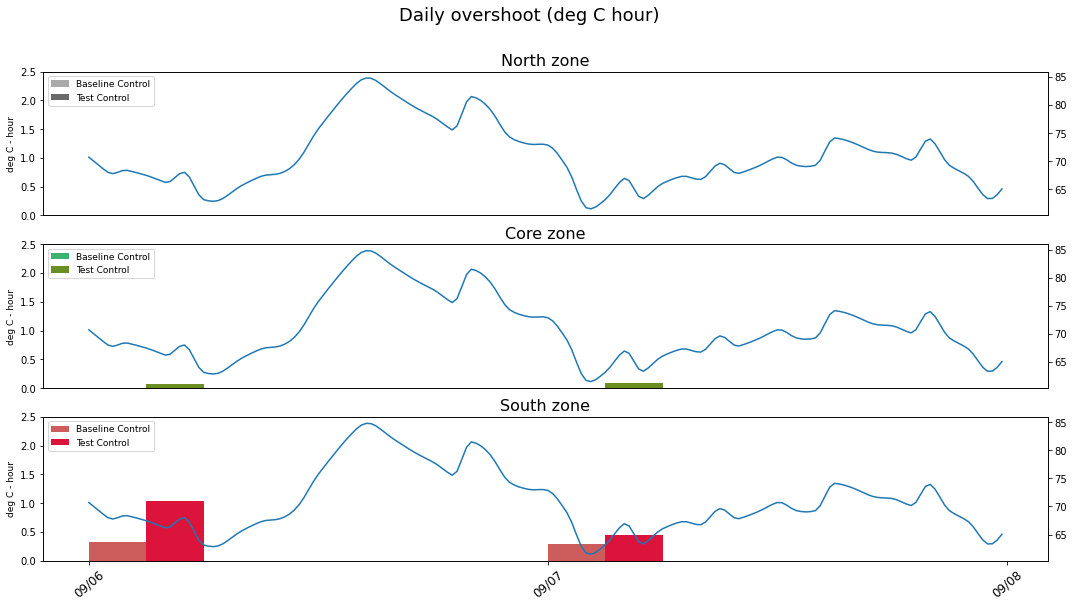

In [48]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
#db_plotting.thermal_comfort_plot(data24, scenario_dict['data24']['nor'], scenario_dict['data25']['nor'], 
thermal_comfort_plot(data24, scenario_dict['data24']['nor'], scenario_dict['data25']['nor'], 
                                 scenario_dict['data24']['cor'], scenario_dict['data25']['cor'], 
                                 scenario_dict['data24']['sou'], scenario_dict['data25']['sou'],
                                 scenario_dict, 0, ylabel[1], title_dict[1])

In [49]:
def demand_plot(data, list_1, list_2, list_3, list_4, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    for i in range(0,len(inp_day)-1):
        labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Shed Baseline', color = 'darkviolet')
    ax.bar(x-width*.5, np.array(list_3)*-1, width = width, label='Precool Baseline', color = 'thistle')
    ax.bar(x+width*.5, list_2, width = width, label='Shed Test', color = 'orange')
    ax.bar(x+width*.5, np.array(list_4)*-1, width = width, label='Precool Test', color = 'khaki')
    ax.axhline(linewidth=1, color='black')

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels[0:len(labels)], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

['09/06', '09/07']
[1015.198175934778, 951.87846618452]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1168/4120796508.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


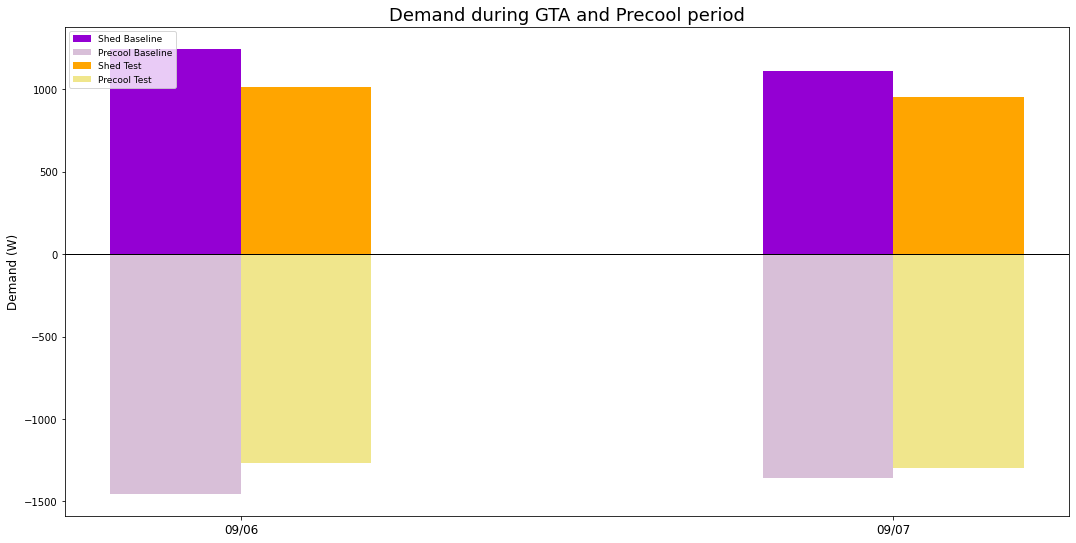

In [50]:
demand_plot(data25, shed_1a, shed_1b, precool_1a, precool_1b, 'Demand during GTA and Precool period', 'Demand (W)')

In [51]:
data25['1A-VAV1-VAVActuatorPosition'] = data25['1A-VAV1-VAVActuatorPosition'].apply(lambda x: x/100)
data25['1A-VAV2-VAVActuatorPosition'] = data25['1A-VAV2-VAVActuatorPosition'].apply(lambda x: x/100)
data25['1A-VAV3-VAVActuatorPosition'] = data25['1A-VAV3-VAVActuatorPosition'].apply(lambda x: x/100)

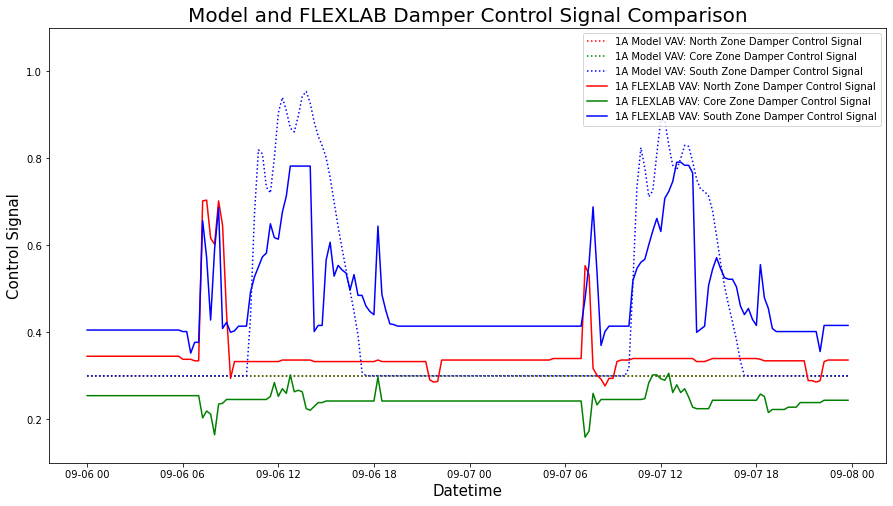

In [52]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns3=ax_left.plot(data24.index,data24['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
lns6=ax_left.plot(data25.index,data25['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

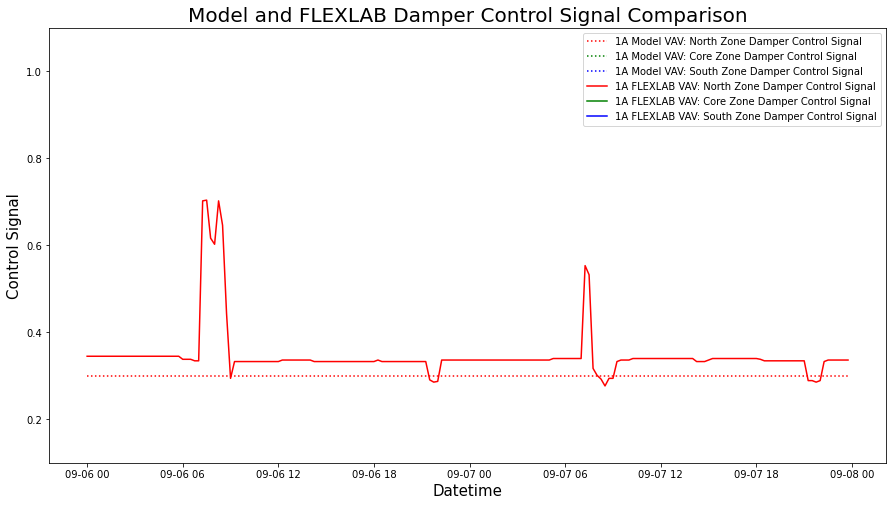

In [53]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
#lns3=ax_left.plot(data24.index,data24['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
#lns6=ax_left.plot(data25.index,data25['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

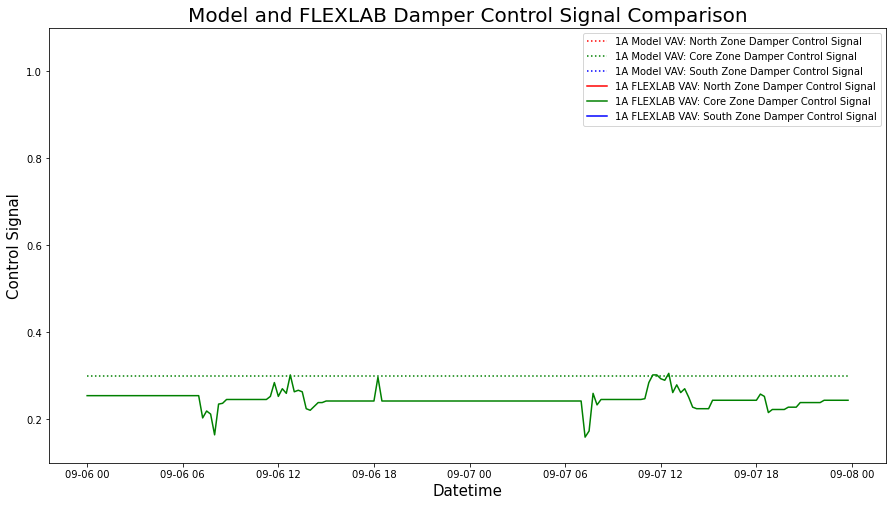

In [54]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
#lns3=ax_left.plot(data24.index,data24['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

#lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
#lns6=ax_left.plot(data25.index,data25['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

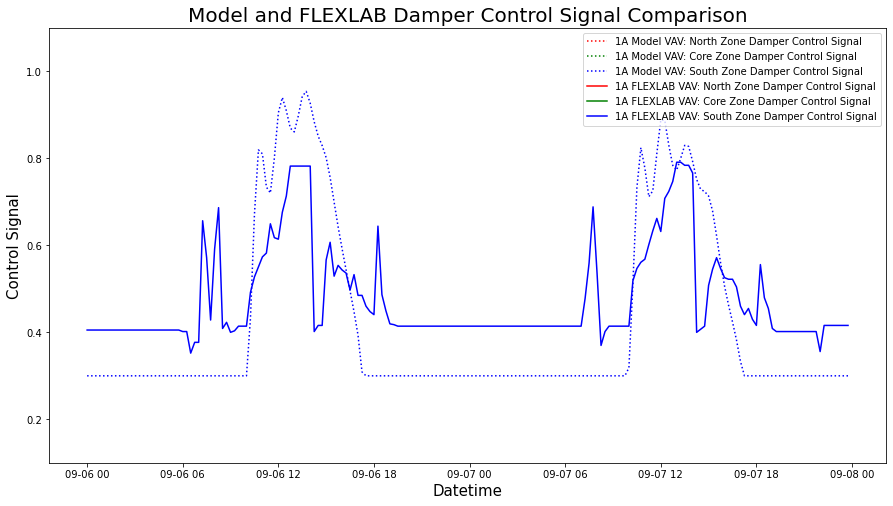

In [55]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns3=ax_left.plot(data24.index,data24['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

#lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
lns6=ax_left.plot(data25.index,data25['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

### 12/16/2021 Data Analysis

In [56]:
data25['1A-OADA-1-POSN'] = data25['1A-OADA-1-POSN'].apply(lambda x: x/100)
data25['1A-RADA-1-POSN'] = data25['1A-RADA-1-POSN'].apply(lambda x: x/100)

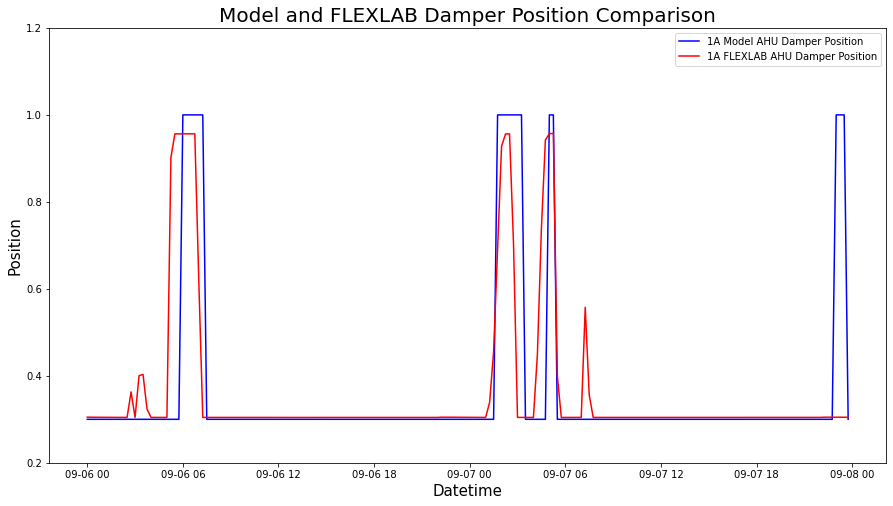

In [57]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns1=ax_left.plot(data24.index,data24['AHU: Outdoor Air Damper Position'],'b-', label="1A Model AHU Damper Position")

#lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
lns2=ax_left.plot(data25.index,data25['1A-OADA-1-POSN'],'r-', label="1A FLEXLAB AHU Damper Position")

plt.title('Model and FLEXLAB Damper Position Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Position',fontsize=15)

lns=lns1+lns2#+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.2,1.2])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [58]:
data25[['1A-OADA-1-POSN']].iloc[8:34]

,1A-OADA-1-POSN
time,
2021-09-06 02:00:00,0.304304
2021-09-06 02:15:00,0.304319
2021-09-06 02:30:00,0.304321
2021-09-06 02:45:00,0.363038
2021-09-06 03:00:00,0.304335
2021-09-06 03:15:00,0.400241
2021-09-06 03:30:00,0.403257
2021-09-06 03:45:00,0.323701
2021-09-06 04:00:00,0.304391


In [59]:
data24[['AHU: Outdoor Air Damper Position']].iloc[95:150]

,AHU: Outdoor Air Damper Position
datetime,
2021-09-06 23:45:00,0.3
2021-09-07 00:00:00,0.3
2021-09-07 00:15:00,0.3
2021-09-07 00:30:00,0.3
2021-09-07 00:45:00,0.3
2021-09-07 01:00:00,0.3
2021-09-07 01:15:00,0.3
2021-09-07 01:30:00,0.3
2021-09-07 01:45:00,1.0


In [60]:
data24[['AHU: Outdoor Air Damper Position']].iloc[183:223]

,AHU: Outdoor Air Damper Position
datetime,
2021-09-07 21:45:00,0.3
2021-09-07 22:00:00,0.3
2021-09-07 22:15:00,0.3
2021-09-07 22:30:00,0.3
2021-09-07 22:45:00,0.3
2021-09-07 23:00:00,1.0
2021-09-07 23:15:00,1.0
2021-09-07 23:30:00,1.0
2021-09-07 23:45:00,0.3


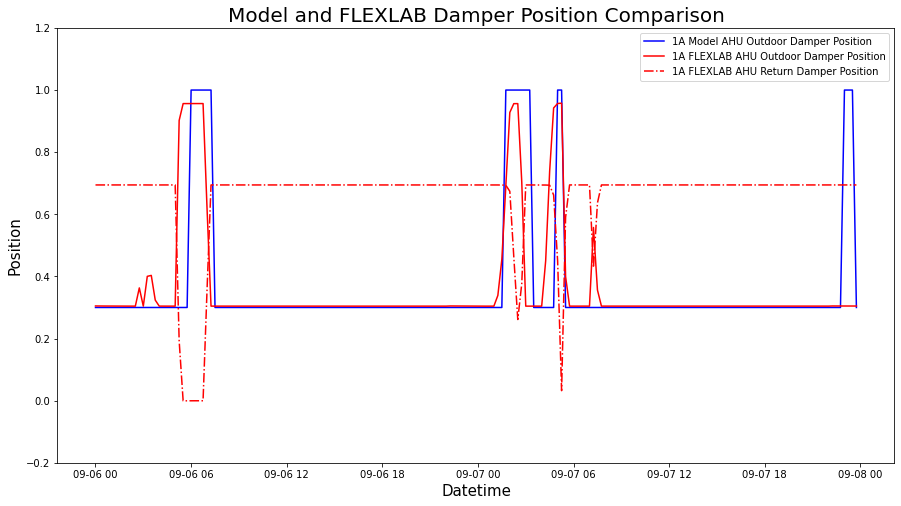

In [66]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data24.index,data24['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data24.index,data24['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns1=ax_left.plot(data24.index,data24['AHU: Outdoor Air Damper Position'],'b-', label="1A Model AHU Outdoor Damper Position")

#lns4=ax_left.plot(data25.index,data25['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data25.index,data25['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")

lns2=ax_left.plot(data25.index,data25['1A-OADA-1-POSN'],'r-', label="1A FLEXLAB AHU Outdoor Damper Position")
lns3=ax_left.plot(data25.index,data25['1A-RADA-1-POSN'],'r-.', label="1A FLEXLAB AHU Return Damper Position")
plt.title('Model and FLEXLAB Damper Position Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Position',fontsize=15)

lns=lns1+lns2+lns3#+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([-0.2,1.2])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [62]:
Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP', 'Theat_SP',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Damper Control Signal', 'AHU: Cooling coil Load',
       'VAV:Core zone Q', 'AHU: Outdoor Air Damper Position',
       'AHU: Supply Fan Power', 'AHU: Supply Fan Airflow Rate',
       'AHU: Cooling Coil Control Signal', 'VAV:North zone Q',
       'VAV:South zone Q', 'datetime', '1B-OAT-1', 'date', 'precool_window',
       'gta_window'],
      dtype='object')
Index(['desk1_plug_power', 'desk2_plug_power', 'desk3_plug_power',
       'desk4_plug_power', 'desk5_plug_power', 'desk6_plug_power',
       'desk3_light_power', 'desk4_light_power', 'desk2_light_power',
       'desk1_6_light_power', 'desk5_light_power', '1A-VAV1-Zn_Temp',
       '1A-VAV2-Zn_Temp', '1A-VAV3-Zn_Temp', '1A-VAV1-OccupiedCoolingSetpt',
       '1A-VAV1-UnoccupiedCoolingSetpt', '1A-VAV1-OccupiedHeatingSetpt',
       '1A-VAV1-UnoccupiedHeatingSetpt', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-UnoccupiedHeatingSetpt', '1A-VAV2-UnoccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', '1A-VAV3-OccupiedCoolingSetpt',
       '1A-VAV3-UnoccupiedHeatingSetpt', '1A-VAV3-UnoccupiedCoolingSetpt',
       '1A-VAV3-OccupiedHeatingSetpt', '1A-El-AHU', '1A-El-CHWP', '1A-El-HWP',
       '1A-El-Exhaust Fan', '1A-Th-Chilled Water', '1B-OAT-1',
       '1A-MidZone-TCS6-DBT', '1A-NorthZone-DBT', '1A-WindowZone-TCS7-DBT',
       '1A-VAV1-DischargeAirTemp', '1A-VAV2-DischargeAirTemp',
       '1A-VAV3-DischargeAirTemp', '1A-VAV1-DischargeAirflow',
       '1A-VAV2-DischargeAirflow', '1A-VAV3-DischargeAirflow', '1A-ASAM-1',
       '1A-ARAM-1', '1A-SAT-1', '1A-OADA-1-POSN', '1A-RADA-1-POSN',
       '1A-VAV1-VAVActuatorPosition', '1A-VAV2-VAVActuatorPosition',
       '1A-VAV3-VAVActuatorPosition', 'datetime', 'date', 'time',
       'precool_window', 'gta_window'],
      dtype='object')

NameError: name 'Index' is not defined